In [166]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from math import sqrt, exp
import random

In [167]:
# Loading Data
data = pd.read_csv('../data/TSP.csv')
data.head(10)

,index,x,y
0,1,565,575
1,2,25,185
2,3,345,750
3,4,945,685
4,5,845,655
5,6,880,660
6,7,25,230
7,8,525,1000
8,9,580,1175
9,10,650,1130


In [168]:
I = data['index'].tolist()
X = data['x'].tolist()
Y = data['y'].tolist()

In [169]:
# Creating tuples
I_array = np.array(I).reshape(52, 1)
X_array = np.array(X).reshape(52, 1)
Y_array = np.array(Y).reshape(52, 1)

In [170]:
points = np.hstack((I_array, X_array, Y_array))
points.shape

(52, 3)

In [171]:
# Task 1 (Random path)
np.random.shuffle(points)

In [172]:
def show_top(points):
    for i in range(10):
        print(points[i])

In [173]:
show_top(points)

[ 44 700 500]
[  6 880 660]
[ 43 875 920]
[ 23 480 415]
[  1 565 575]
[  52 1740  245]
[ 36 685 610]
[  3 345 750]
[ 24 835 625]
[  28 1250  400]


In [174]:
print(np.amin(X_array))
print(np.amax(X_array))

25
1740


In [175]:
print(np.amin(Y_array))
print(np.amax(Y_array))

5
1175


In [176]:
def plot_path(points):
    max_length = len(points)
    for i in range(max_length):
        i1, x1, y1 = points[i]
        plt.plot(x1, y1, "o", color='r')
        plt.text(x1, y1, i1)
        if (i + 1) < max_length:
            i2, x2, y2 = points[i + 1]
            plt.plot([x1, x2], [y1, y2], linestyle='-', color='b', linewidth=1)
    plt.axis([-50, 2000, -50, 1300])
    plt.show()    

In [177]:
def get_distance(points, metrics):
    dist = 0
    max_length = len(points)
    for i in range(max_length):
        i1, x1, y1 = points[i]
        if (i + 1) < max_length:
            i2, x2, y2 = points[i + 1]
            dist += metrics(x1, x2, y1, y2)
    return dist

In [178]:
manhattan = lambda x1, x2, y1, y2: abs(x1 - x2) + abs(y1 - y2)
euclid = lambda x1, x2, y1, y2: sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

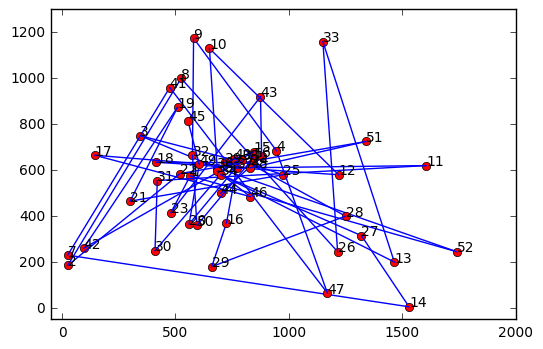

In [179]:
plot_path(points)
        

In [180]:
print("Distance =", get_distance(points, manhattan))

Distance = 38450


In [181]:
# Task 2 (Hill climbing method)
np.random.shuffle(points)
show_top(points)    

[ 48 830 610]
[ 16 725 370]
[ 49 605 625]
[ 43 875 920]
[ 32 575 665]
[ 42  95 260]
[  2  25 185]
[  52 1740  245]
[ 24 835 625]
[   8  525 1000]


In [182]:
def get_next_hill(points, index):
    result = np.array([])
    length = len(points)
    score = get_distance(points, euclid)
    test_value = points[index]
    for i in range(index, length):
        variant = np.array(points)
        variant[index] = variant[i]
        variant[i] = test_value
        new_score = get_distance(variant, euclid)
        if new_score < score:
            result = variant
            score = new_score
    return result

In [183]:
print("Start distance =", get_distance(points, euclid))


Start distance = 28954.5881386194


In [184]:
for i in range (1, len(points)):
    result = get_next_hill(points, i)
    if result.size != 0:
        points = result
        print("Distance:", get_distance(result, euclid))

Distance: 28374.028788636497
Distance: 27223.586597645182
Distance: 26613.052700104752
Distance: 25368.685173037935
Distance: 25266.54658789777
Distance: 24206.658844253412
Distance: 23703.688241765427
Distance: 22334.20831112952
Distance: 22008.83022169928
Distance: 21711.605191529718
Distance: 20911.394501327104
Distance: 20471.88653873104
Distance: 20383.24209080797
Distance: 19958.160627086425
Distance: 19915.16269682231
Distance: 19855.062875784497
Distance: 19028.962796754302
Distance: 18930.391557008392
Distance: 18505.357648295907
Distance: 18342.76875884815
Distance: 18169.672342843
Distance: 18132.694406756724
Distance: 18124.211578649112
Distance: 18112.870599960977
Distance: 18023.678621560586
Distance: 17992.239587529206
Distance: 17800.278784927075
Distance: 17668.97148541824
Distance: 17663.632544735396
Distance: 17621.223154437717


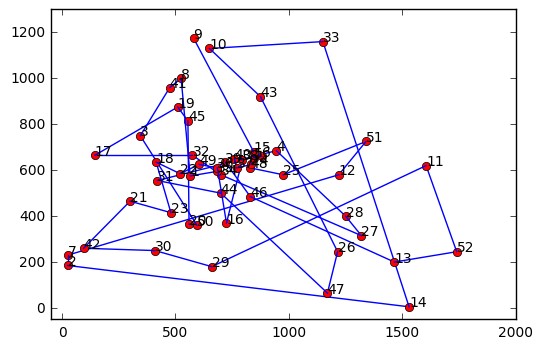

In [185]:
plot_path(points)

In [186]:
print("Distance:", get_distance(points, euclid))

Distance: 17621.223154437717


In [187]:
show_top(points) 

[ 48 830 610]
[ 25 975 580]
[  51 1340  725]
[  12 1220  580]
[  7  25 230]
[  2  25 185]
[  14 1530    5]
[  33 1150 1160]
[  10  650 1130]
[ 43 875 920]


In [188]:
# Task 3 (Simulated Annealing)

In [189]:
points = np.hstack((I_array, X_array, Y_array))
np.random.shuffle(points)
show_top(points)    

[   9  580 1175]
[ 38 795 645]
[  13 1465  200]
[ 21 300 465]
[ 42  95 260]
[  5 845 655]
[  33 1150 1160]
[ 35 685 595]
[  3 345 750]
[ 31 420 555]


In [190]:
anneal_result = np.array(points)
anneal_score = get_distance(points, euclid)

print("Anneal start dist =", anneal_score)

Anneal start dist = 29793.848815538757


In [191]:
def probability(prev_score, next_score, temperature):
    if next_score > prev_score:
        return 1.0
    else:
        return exp(-abs(next_score - prev_score) / temperature )

In [192]:
def get_next(points, index):
    result = np.array([])
    length = len(points)
    score = get_distance(points, euclid)
    test_value = points[index]
    for i in range(1, length):
        variant = np.array(points)
        variant[index] = variant[i]
        variant[i] = test_value
        new_score = get_distance(variant, euclid)
        if new_score < score:
            result = variant
            score = new_score
            continue
        if result.size == 0:
            result = variant
    return result

In [193]:
temperature = np.linspace(20000, 0.1, 150)

In [194]:
for temp in temperature:
    temp_answer = points
    length = len(points)
    for i in range(1, length):
        neighbour = get_next(temp_answer, i)
        prev_score = get_distance(temp_answer, euclid)
        next_score = get_distance(neighbour, euclid)
        P = probability(prev_score, next_score, temp)
        if random.random() < P:
            temp_answer = neighbour
    temp_score = get_distance(temp_answer, euclid)
    if (anneal_score > temp_score):
        anneal_score = temp_score
        anneal_result = temp_answer
        print("Temp =", temp)
        print("Dist =", anneal_score)
        

Temp = 20000.0
Dist = 17110.573241255493
Temp = 19597.3174497
Dist = 13883.869040052909
Temp = 10469.8463087
Dist = 13694.446038556562
Temp = 6308.79328859
Dist = 13609.860984944107
Temp = 5234.97315436
Dist = 13257.84547440264


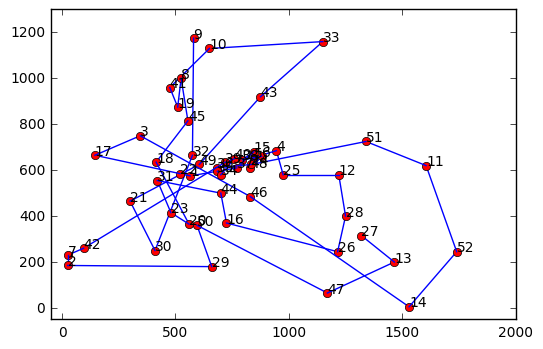

In [195]:
plot_path(anneal_result)

In [196]:
print("Score =", anneal_score)

Score = 13257.84547440264
